In [96]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [97]:
leases = pd.read_csv('datafest-data-read-only/Leases.csv')
print(Leases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  internal_class  

In [98]:
priceANDavailability = pd.read_csv('datafest-data-read-only/Price_and_Availability_Data.csv')
print(priceANDavailability.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            1680 non-null   int64  
 1   quarter                         1680 non-null   object 
 2   market                          1680 non-null   object 
 3   internal_class                  1680 non-null   object 
 4   RBA                             1680 non-null   int64  
 5   available_space                 1680 non-null   int64  
 6   availability_proportion         1680 non-null   float64
 7   internal_class_rent             1680 non-null   float64
 8   overall_rent                    1680 non-null   float64
 9   direct_available_space          1380 non-null   float64
 10  direct_availability_proportion  1380 non-null   float64
 11  direct_internal_class_rent      1380 non-null   float64
 12  direct_overall_rent             13

In [99]:
majorMarket = pd.read_csv('datafest-data-read-only/Major_Market_Occupancy_Data-revised.csv')
print(majorMarket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           190 non-null    int64  
 1   quarter                        190 non-null    object 
 2   market                         190 non-null    object 
 3   ending_occupancy_proportion    190 non-null    float64
 4   starting_occupancy_proportion  190 non-null    float64
 5   avg_occupancy_proportion       190 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.0+ KB
None


In [100]:
unemployment = pd.read_csv('datafest-data-read-only/Unemployment.csv')
print(unemployment.describe())
print(unemployment.info())

              year        month  unemployment_rate
count  1848.000000  1848.000000        1848.000000
mean   2021.000000     6.500000           4.515368
std       2.000541     3.452987           2.214930
min    2018.000000     1.000000           1.800000
25%    2019.000000     3.750000           3.300000
50%    2021.000000     6.500000           4.000000
75%    2023.000000     9.250000           4.800000
max    2024.000000    12.000000          22.600000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1848 non-null   int64  
 1   quarter            1848 non-null   object 
 2   month              1848 non-null   int64  
 3   state              1848 non-null   object 
 4   unemployment_rate  1848 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 72.3+ KB
None


In [101]:
main_without_majorMarketInfo2018 = pd.merge(leases, priceANDavailability, on=['year', 'quarter', 'market'], how='inner')

main_with_majorMarketInfo2020 = pd.merge(main_without_majorMarketInfo2018, majorMarket, on=['year', 'quarter', 'market'], how='inner')
#Sample size significantly decrease as majorMarket dataset only contains data after 2020, we lost three years of data.

print("Main without major markets Dataset Infomation")
print(main_without_majorMarketInfo2018.info())
print("")
print("")
print("Main with major markets Dataset Infomation")
print(main_with_majorMarketInfo2020.info())

Main without major markets Dataset Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   building_name                     237882 non-null  object 
 5   building_id                       291088 non-null  object 
 6   address                           291088 non-null  object 
 7   region                            291088 non-null  object 
 8   city                              291088 non-null  object 
 9   state                             291088 non-null  object 
 10  zip                               291086 non-null  float64
 11  intern

In [102]:
columns_to_drop = [
    "building_name", "building_id", "address", "zip", 
    "direct_available_space", "direct_availability_proportion", 
    "direct_internal_class_rent", "direct_overall_rent", 
    "sublet_available_space", "sublet_availability_proportion", 
    "sublet_internal_class_rent", "sublet_overall_rent", "company_name", "internal_market_cluster"
    
]

# Keep only columns that are present
existing_cols = [col for col in columns_to_drop if col in main_without_majorMarketInfo2018.columns]

# Drop safely
main_without_majorMarketInfo2018_drop = main_without_majorMarketInfo2018.drop(existing_cols, axis=1)
main_without_majorMarketInfo2018_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   region                            291088 non-null  object 
 5   city                              291088 non-null  object 
 6   state                             291088 non-null  object 
 7   internal_submarket                291088 non-null  object 
 8   internal_class_x                  291082 non-null  object 
 9   leasedSF                          291088 non-null  float64
 10  internal_industry                 41176 non-null   object 
 11  transaction_type                  290340 non-null  o

In [103]:
main_without_majorMarketInfo2018_drop.drop(columns = "internal_industry").dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 232956 entries, 11282 to 291083
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              232956 non-null  int64  
 1   quarter                           232956 non-null  object 
 2   monthsigned                       232956 non-null  float64
 3   market                            232956 non-null  object 
 4   region                            232956 non-null  object 
 5   city                              232956 non-null  object 
 6   state                             232956 non-null  object 
 7   internal_submarket                232956 non-null  object 
 8   internal_class_x                  232956 non-null  object 
 9   leasedSF                          232956 non-null  float64
 10  transaction_type                  232956 non-null  object 
 11  costarID                          232956 non-null  in

In [104]:
x = 'internal_class_x'
y = 'internal_class_y'
diff_count = (main_without_majorMarketInfo2018_drop[x] != main_without_majorMarketInfo2018_drop[y]).sum()
print(f"Number of differing values of {x}: {diff_count}")


Number of differing values of internal_class_x: 145547


In [105]:
cols_to_drop = [col for col in main_without_majorMarketInfo2018_drop.columns if col.endswith('_y')]
main_without_majorMarketInfo2018_drop.drop(columns=cols_to_drop, inplace=True)


In [106]:
main_without_majorMarketInfo2018_drop.rename(
    columns={col: col[:-2] for col in main_without_majorMarketInfo2018.columns if col.endswith('_x')},
    inplace=True
)
main_without_majorMarketInfo2018_drop = main_without_majorMarketInfo2018_drop[main_without_majorMarketInfo2018_drop['leasedSF'] >= 10000]
main_without_majorMarketInfo2018_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 0 to 291087
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            44214 non-null  int64  
 1   quarter                         44214 non-null  object 
 2   monthsigned                     43142 non-null  float64
 3   market                          44214 non-null  object 
 4   region                          44214 non-null  object 
 5   city                            44214 non-null  object 
 6   state                           44214 non-null  object 
 7   internal_submarket              44214 non-null  object 
 8   internal_class                  44214 non-null  object 
 9   leasedSF                        44214 non-null  float64
 10  internal_industry               25790 non-null  object 
 11  transaction_type                43812 non-null  object 
 12  costarID                        4421

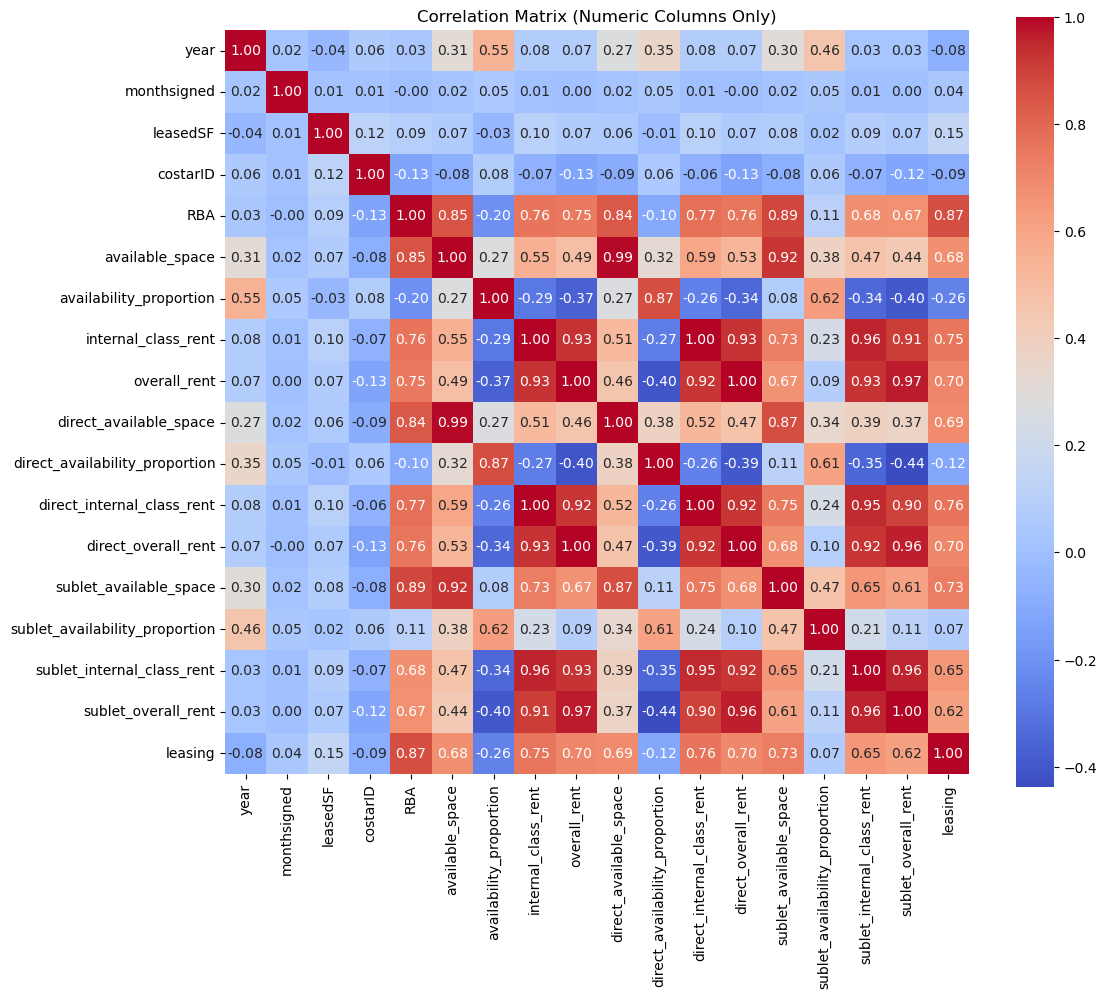

In [107]:
numeric_df = main_without_majorMarketInfo2018_drop.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Optional: display or visualize it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()


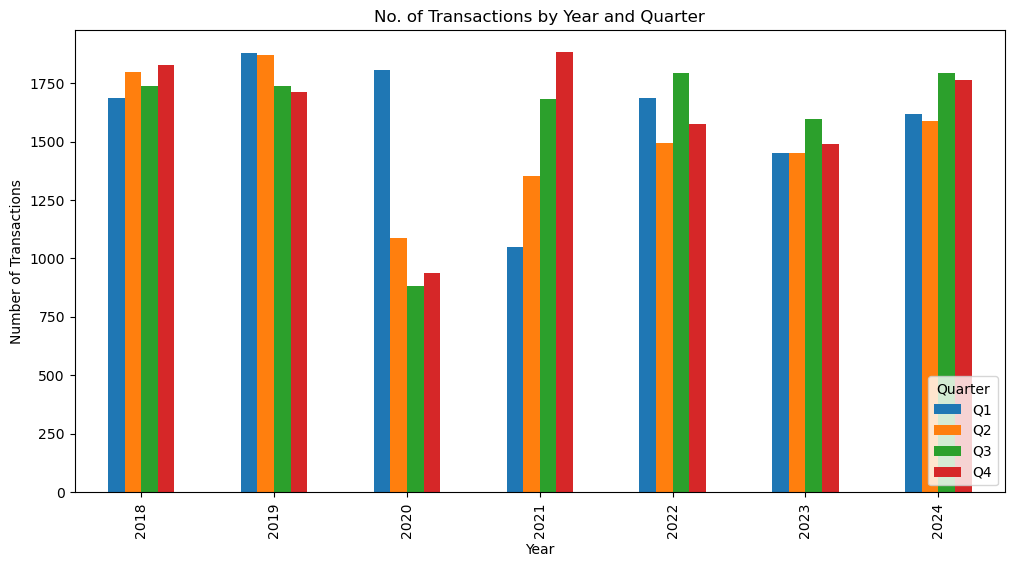

In [108]:
grouped_counts = main_without_majorMarketInfo2018_drop.groupby(['year', 'quarter']).size()

# 2. Unstack so that quarters become columns and years remain the index
grouped_counts = grouped_counts.unstack('quarter')  
# Now, grouped_counts has years on the rows and quarters on the columns

# 3. Create a bar plot with years on the x-axis and quarters in different colors
ax = grouped_counts.plot(kind='bar', figsize=(12, 6))
# 4. Label the axes and add a title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Transactions')
ax.set_title('No. of Transactions by Year and Quarter')

# 5. Show the legend and plot
plt.legend(title='Quarter', loc = 'lower right')
plt.show()